# **The Titanic Disaster: Predict Who Survived**

**Goal:**

Predict who survived.

**Contents:**

EDA <br>
Data Preprocessing <br>
Modelling <br>

**Data Definitions**

Variable - Definition - Key  
Survived: Survival, 0 = No, 1 = Yes  
pclass: Ticket class, 1 = 1st, 2 = 2nd, 3 =  
sex: Sex  
Age: Age in years  
sibsp: Number of siblings / spouses aboard the Titanic  
parch: Number of parents / children aboard the Titanic  
ticket: Ticket number  
fare: Passenger fare  
cabin: Cabin number  
embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton  

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data and EDA

In [2]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')

titanic_copy = titanic.copy()

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Inital Data Preprocessing

In [7]:
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.Embarked = titanic_copy.Embarked.map({np.nan:0,'S':1,'C':2,'Q':3})
titanic.Embarked.value_counts()

1    644
2    168
3     77
0      2
Name: Embarked, dtype: int64

In [9]:
separator = ['-'*40]
titanic_null_columns = titanic.isnull().any()
no_null_age_col = titanic['Age'].isnull().sum()

print('%s\n%s\nThe total number of null values in the Age Column: %s' %(titanic_null_columns,separator,no_null_age_col))

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool
['----------------------------------------']
The total number of null values in the Age Column: 177


We will sort our titanic dataframe by age and use fillna with front fill to clean up null values in the Age Column.

In [10]:
sorted_by_age = titanic.sort_values('Age')
sorted_by_age.fillna(method = 'ffill', inplace=True)
titanic_cleaned = sorted_by_age.sort_values('PassengerId')

before_null_val_count = titanic.Age.isnull().sum() 
after_null_val_count = titanic_cleaned.Age.isnull().sum()

print(f'\nTotal number of null values before cleaning in Age column: {before_null_val_count} \
        \nTotal number of null values after cleaning in Age column: {after_null_val_count}')


Total number of null values before cleaning in Age column: 177         
Total number of null values after cleaning in Age column: 0


In [11]:
titanic_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,E33,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,C148,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,C99,1


# EDA

<AxesSubplot:>

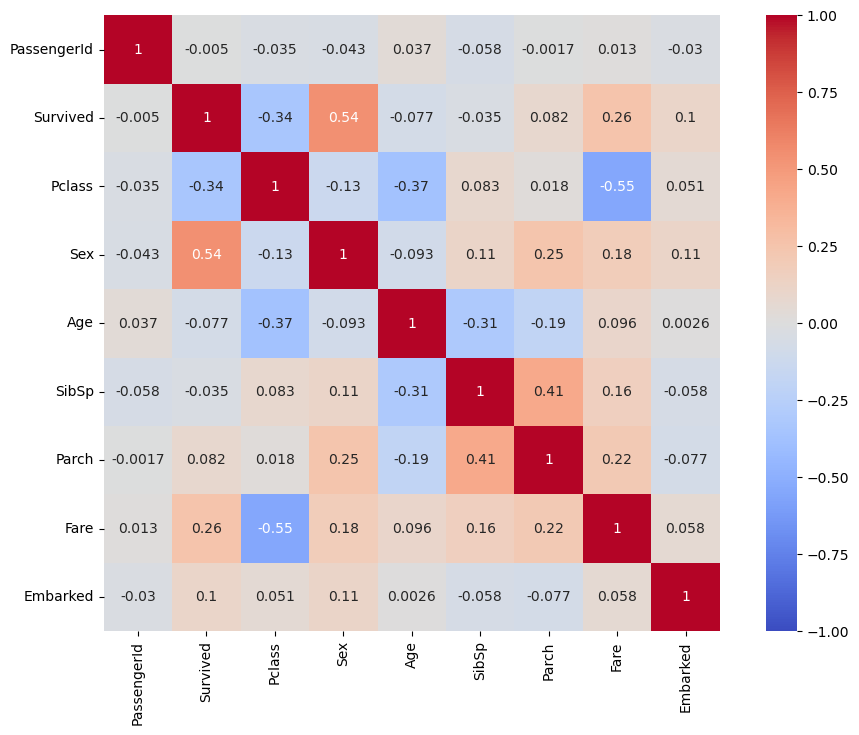

In [12]:
correlations = titanic.corr()

plt.figure(figsize = [12,8])
sns.heatmap(data = correlations, vmin = -1.0, vmax = 1.0, square = True, cmap = 'coolwarm', annot = True)

# Perish Probability

Some features that have strong correlation to the Survived feature from the heatmap are Sex, Pclass and Fare. It is surprising to see that some features such as Age have a weak correlation.  Let us explore these features in more detail. <br>

We can calculate a simplified value of perish probability for each feature and visualise them to help us gain insight into the most suitable features to be used in our machine learning models.




In [13]:
def reorder(row):
    ''' Reorder the counts of the survivors and those that perished into columns from rows'''
    
    
    if row['Survived'] == 1:
        row['Alive_Count'] = row['Total_Counts']
    else:
        row['Perish_Count'] = row['Total_Counts']
    return row

def Calculate_Perish_Probability(feature1):
    ''' Returns a dataframe with the columns feature1, Perish_Count, Total_Counts and Perish_Probability.
    \nfeature1 is the feature that you want to calculate the perish probability for.
    
    '''
    
    # Extract target feature from main dataset. Seperate the counts of those that have perished
    # and those that have survived. Create a dataframe for this data.
    groupby_df_initial = pd.DataFrame(titanic_cleaned.groupby([feature1,'Survived'])['Survived'].count())
    groupby_df_initial.rename({'Survived' : 'Total_Counts'}, axis = 1, inplace = True)
    groupby_df_initial.reset_index(inplace = True)
    
    # Create seperate columns for the perished and survived.
    reordered_df = groupby_df_initial.apply(reorder, axis = 1).fillna(0)
    reordered_df.drop(['Survived'], axis = 1, inplace = True)
    
    # Extract perish count and total counts to a dataframe with the feature1 and calculate the perish probability
    final_df = reordered_df.groupby(feature1)['Perish_Count', 'Total_Counts'].sum().reset_index()
    final_df['Perish_Probability'] = final_df['Perish_Count'] / final_df['Total_Counts']
    
    return final_df

In [14]:
Ticket_Class_Perish_Probability = Calculate_Perish_Probability('Pclass')
Fare_Perish_Probability = Calculate_Perish_Probability('Fare')
Sex_Perish_Probability = Calculate_Perish_Probability('Sex')
Age_Perish_Probability = Calculate_Perish_Probability('Age')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


# Visual Representations

Pclass is a representation of the socio-economic status of each customer. A 1st class ticket with Pclass = 1, a 2nd class ticket with Pclass = 2 and a third class ticket with Pclass = 3.

In [15]:
separator = ['-'*60]
dataframes = [Ticket_Class_Perish_Probability, Sex_Perish_Probability, Fare_Perish_Probability , Age_Perish_Probability]
titles = ['Ticket Class', 'Sex', 'Fare Value', 'Age']

for i in range(4):
    print("%s\n%s\n {%s}" %(titles[i],dataframes[i],separator[0]))

Ticket Class
   Pclass  Perish_Count  Total_Counts  Perish_Probability
0     1.0          80.0         216.0            0.370370
1     2.0          97.0         184.0            0.527174
2     3.0         372.0         491.0            0.757637
 {------------------------------------------------------------}
Sex
   Sex  Perish_Count  Total_Counts  Perish_Probability
0  0.0         468.0         577.0            0.811092
1  1.0          81.0         314.0            0.257962
 {------------------------------------------------------------}
Fare Value
         Fare  Perish_Count  Total_Counts  Perish_Probability
0      0.0000          14.0          15.0            0.933333
1      4.0125           1.0           1.0            1.000000
2      5.0000           1.0           1.0            1.000000
3      6.2375           1.0           1.0            1.000000
4      6.4375           1.0           1.0            1.000000
..        ...           ...           ...                 ...
243  227.5250

Let us now visualise the perish probability for each feature.

In [16]:
def plot_reg(data_input,title,x_axis, **kwargs):
    '''Plot a regplot with customised features'''
    
    # keyword arguments
    x_ticks_labels =  kwargs.get('x_ticks_labels', None)
    x_label_name = kwargs.get('x_label_name', None)
    x_ticks = kwargs.get('x_ticks', None)
    y_labels = kwargs.get('y_labels', None)
    subplot =  kwargs.get('axes', None)
    
    
    # main graph features
    graph = sns.regplot(data = data_input, x = x_axis, y = 'Perish_Probability', ax = subplot)
    graph.title.set_text(title)
    
    
    # x axis
    if x_label_name != None:
        graph.set_xlabel(x_label_name)
    if x_ticks != None:
        graph.set_xticks(data_input[x_axis])
        
    
    # y axis
    graph.set_ylabel('Perish Probability')
    graph.set(ylim = (data_input['Perish_Probability'].min() - 0.1, data_input['Perish_Probability'].max() + 0.1))

    
def plot_bar(data_input,title,x_axis, **kwargs):
    '''Plot a bar graph with customised features'''
    
    # keyword arguments
    x_ticks_labels =  kwargs.get('x_ticks_labels', None)
    x_label_name = kwargs.get('x_label_name', None)
    x_ticks = kwargs.get('x_ticks', None)
    y_labels = kwargs.get('y_labels', None)
    subplot =  kwargs.get('axes', None)
    
    
    # main graph features
    graph = sns.barplot(data = data_input, x = x_axis, y = 'Perish_Probability', ax = subplot)
    graph.title.set_text(title)
    
    
    # x axis
    if x_label_name != None:
        graph.set_xlabel(x_label_name)
    if x_ticks != None:
        graph.set_xticks(data_input[x_axis])
    if x_ticks_labels != None:
        graph.set_xticklabels(x_ticks_labels)
        
    
    # y axis
    graph.set_ylabel('Perish Probability')
    graph.set(ylim = (data_input['Perish_Probability'].min() - 0.1, data_input['Perish_Probability'].max() + 0.1))

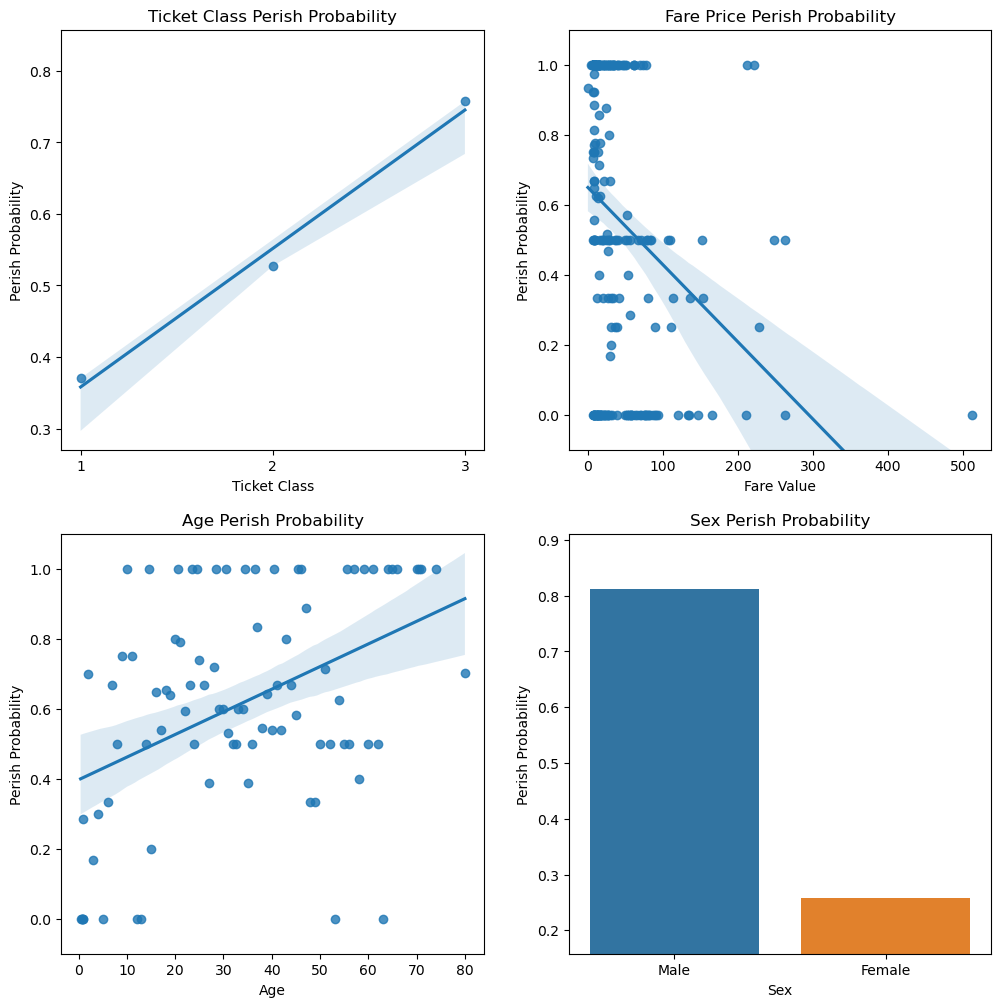

In [17]:
fig, ax = plt.subplots(2,2, figsize = [12,12])

plot_reg(data_input = Ticket_Class_Perish_Probability, title = 'Ticket Class Perish Probability', x_axis = 'Pclass', x_label_name = 'Ticket Class', 
        axes = ax[0,0], x_ticks = True)
plot_reg(data_input = Fare_Perish_Probability, title = 'Fare Price Perish Probability', x_axis = 'Fare', x_label_name = 'Fare Value', 
        axes = ax[0,1])
plot_reg(data_input = Age_Perish_Probability, title = 'Age Perish Probability', x_axis = 'Age', x_label_name = 'Age', 
        axes = ax[1,0])
plot_bar(data_input = Sex_Perish_Probability, title = 'Sex Perish Probability', x_axis = 'Sex', x_label_name = 'Sex', 
        axes = ax[1,1], x_ticks_labels = ('Male', 'Female'))


Ticket Class:  
A positive correlation between perish probability and ticket class.
 
Fare Value:   
A negative correlation between perish probability and fare value. 
 
Age:
A positive correlation between perish probability and age.
 
Sex:
Male sex has higher perish probability than female sex.

# Further Exploration with Age Feature

<AxesSubplot:xlabel='Age', ylabel='Count'>

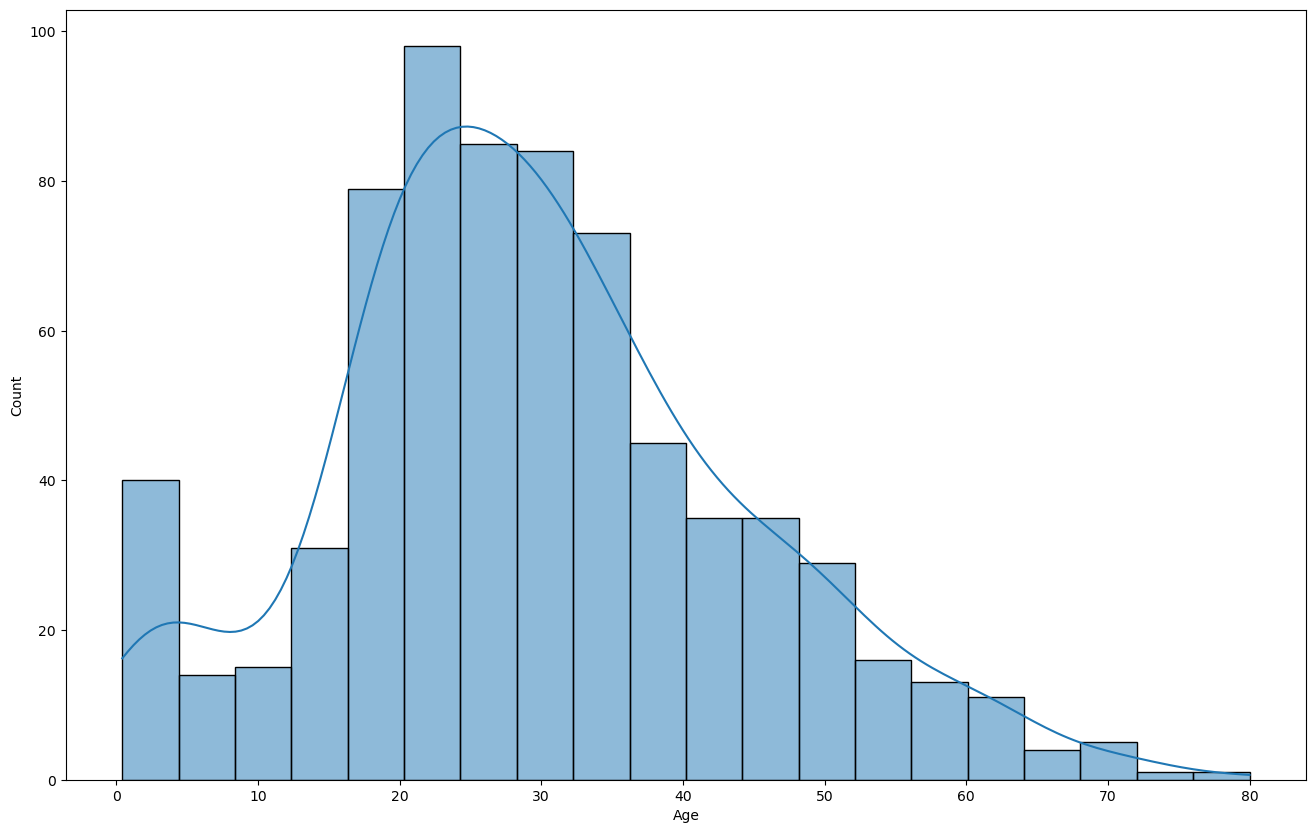

In [18]:
plt.figure(figsize=[16,10])
sns.histplot(data=titanic, x='Age', kde =True)

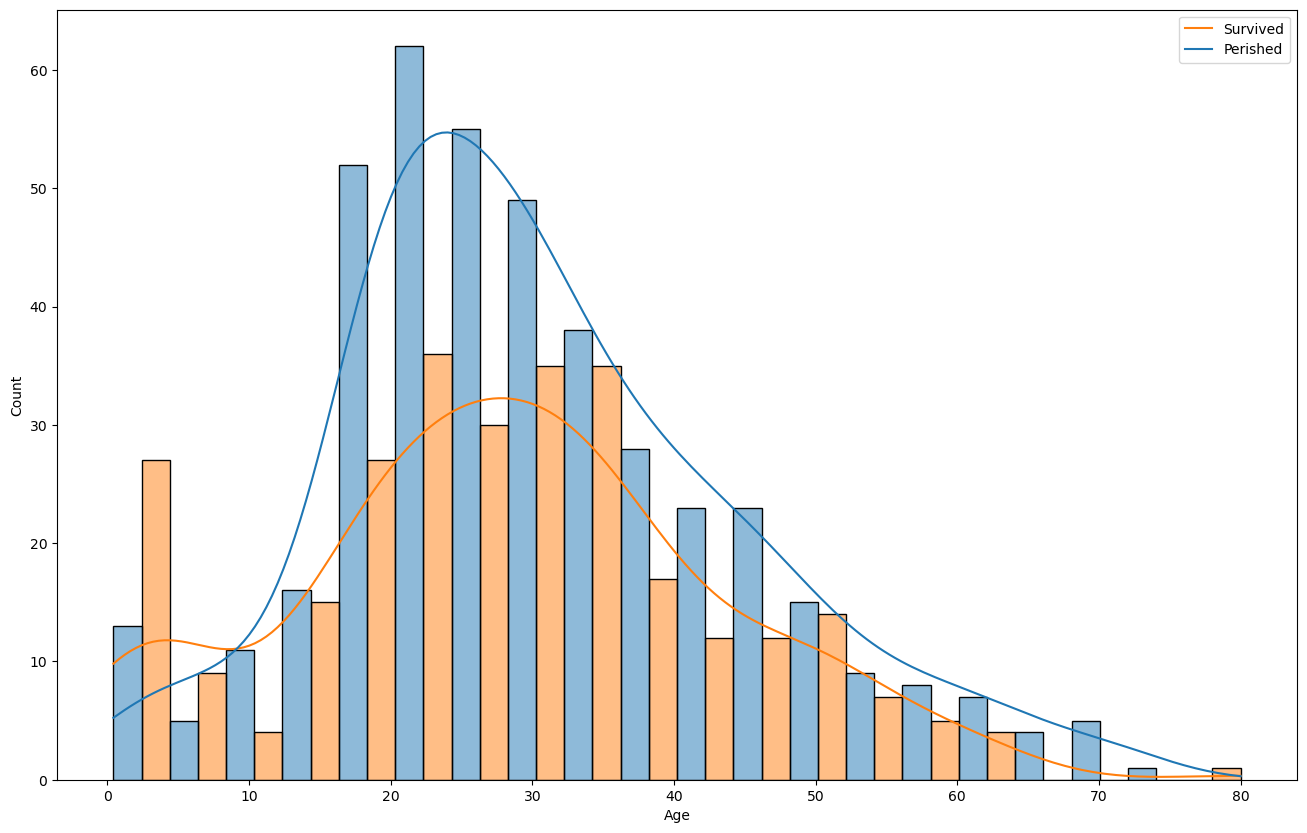

In [19]:
plt.figure(figsize=[16,10])
sns.histplot(data=titanic, x='Age', hue='Survived', multiple='dodge', kde =True)

plt.legend(labels = ['Survived', 'Perished'])

Seems that the only age range that survived more than perished was between the ages of 0 to 9.

The age range between 20 to 35 experienced the largest perish to survive ratio.

# Modelling

We will use the following features in our models.

Features: Pclass, Sex, Age, SibSp, Parch, Ticket, Fare  
Target: Survived

Models to be used:

Random Forest  
XGBooster

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [21]:
#select features and split training data and validation data
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

X = titanic_cleaned[features]
y = titanic_cleaned['Survived']

X_train, X_value, y_train, y_value = train_test_split(X,y, test_size = 0.2, train_size = 0.8, random_state = 0)

In [22]:
# Random forest model

# Setup, fit and train model
RandomForestModel = RandomForestClassifier(random_state = 0)
RandomForestModel.fit(X_train,y_train)
predictions = RandomForestModel.predict(X_value)
score = accuracy_score(y_value, predictions)

print(f'Accuracy: {score}')

scores = cross_val_score(RandomForestModel, X, y, cv = 5, scoring = 'accuracy')
mean_cross_val_score = scores.mean()

print(f'Cross validation scores: {mean_cross_val_score}')

Accuracy: 0.8547486033519553
Cross validation scores: 0.8137530600715586


In [23]:
#random forest grid search

param_grid = {
    'n_estimators' : [100,250,500],
    'max_depth' : [3,5,10],
    'min_samples_split': [2,5,10],
    'min_samples_leaf' : [1,5,10]
}

gridsearch = GridSearchCV(RandomForestModel, param_grid = param_grid, cv = 5)
gridsearch.fit(X_train, y_train)

print('Best parameters found by grid search:', gridsearch.best_params_)
print('Best score found by grid search:', gridsearch.best_score_)

best_rf = gridsearch.best_estimator_
test_score = best_rf.score(X_value, y_value)

print(f'\nTest score: {test_score}')

Best parameters found by grid search: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best score found by grid search: 0.8314488328572835

Test score: 0.8435754189944135


In [24]:
best_rf = gridsearch.best_estimator_
test_score = best_rf.score(X_value, y_value)

print(f'\nTest score: {test_score}')


Test score: 0.8435754189944135


In [25]:
#XGBoost

# Setup, fit and train model
xgb = XGBClassifier(random_state = 0)

# Setup hyper parameter grid

param_grid = {
    'n_estimators' : [100,250,500],
    'max_depth' : [3,5,10],
    'learning_rate' : [0.05,0.1,0.3]
}

# Set up and fit training data to grid search

grid_search = GridSearchCV(xgb, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print('Best parameters from grid search:', grid_search.best_params_)
print('Best score from grid search:', grid_search.best_score_)

best_xgb = grid_search.best_estimator_
test_score = best_xgb.score(X_value, y_value)

print('Test score result:',test_score)

Best parameters from grid search: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 250}
Best score from grid search: 0.8272333300502315
Test score result: 0.8379888268156425


It seems that the accuracy of the score is high. This suggests that our model is sufficiently accurate. It seems that teh xgb model has a higher average test score than the standard random forest model. We can now make predictions with the main test dataset. 

In [26]:
final_titanic_data = pd.read_csv('/kaggle/input/titanic/test.csv')

def fillna_ffill(column_name):
    
    separator = ['-'*40]
    col = column_name
    null_col_amount = final_titanic_data[col].isnull().sum()
    
    print(f'The total number of null values in the {col} Column: {null_col_amount}')

    sorted_by_age = final_titanic_data.sort_values(col)
    sorted_by_age.fillna(method = 'ffill', inplace=True)
    final_titanic_cleaned = sorted_by_age.sort_values('PassengerId')

    before_null_val_count = final_titanic_data[col].isnull().sum() 
    after_null_val_count = final_titanic_cleaned[col].isnull().sum()

    print(f'\nTotal number of null values before cleaning in Age column: {before_null_val_count} \
            \nTotal number of null values after cleaning in Age column: {after_null_val_count}')
    
    return final_titanic_cleaned

In [27]:
final_titanic_data['Sex'] = final_titanic_data['Sex'].map({'male':0,'female':1})

titanic_null_cols = final_titanic_data.isnull().any()
print(titanic_null_cols)

final_titanic_cleaned = fillna_ffill('Fare')
print('-------------------------')
final_titanic_cleaned = fillna_ffill('Age')
print('-------------------------')

final_titanic_cleaned.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
The total number of null values in the Fare Column: 1

Total number of null values before cleaning in Age column: 1             
Total number of null values after cleaning in Age column: 0
-------------------------
The total number of null values in the Age Column: 86

Total number of null values before cleaning in Age column: 86             
Total number of null values after cleaning in Age column: 0
-------------------------


PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [28]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

X_final = final_titanic_cleaned[features]

predictions = best_xgb.predict(X_final)

In [29]:
submission_df = pd.DataFrame({'PassengerId' : final_titanic_cleaned['PassengerId'], 'Survived' : predictions})

submission_df.to_csv('submission.csv', index=False)